In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the base directory where your labeled image subdirectories are located
base_dir = '/content/drive/MyDrive/divided_datathon_dataset/train'

# Define subdirectories for different labels
label_directories = ['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']

# Create an empty list to store the image file paths and labels
image_paths = []
labels = []

# Loop through each label directory and collect image file paths and labels
for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(base_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):  # Assuming your images are in JPEG format
            image_paths.append(os.path.join(label_path, image_file))
            labels.append(label_idx)  # Use label index as the label

# Convert labels to TensorFlow one-hot encoding
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=len(label_directories))

# Define an ImageDataGenerator for data augmentation (optional)
data_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # You can add more augmentation settings here

# Create image generators for training and validation
batch_size = 32
train_generator = data_generator.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Adjust based on your image size requirements
    batch_size=batch_size,
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/divided_datathon_dataset/val',
    target_size=(224, 224),
    batch_size=batch_size,
)

# Print class indices for reference
print("Class indices:", train_generator.class_indices)

# Now you can use train_generator and validation_generator to train your model


Found 1553 images belonging to 4 classes.
Found 647 images belonging to 4 classes.
Class indices: {'category1_tumor': 0, 'category2_tumor': 1, 'category3_tumor': 2, 'no_tumor': 3}


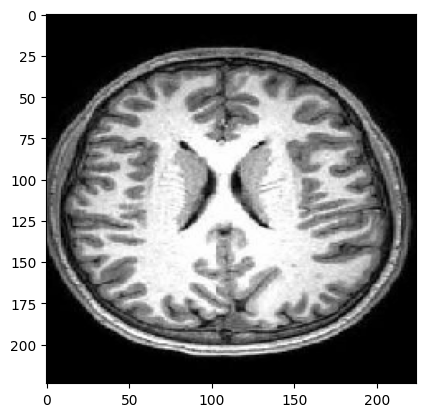

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(validation_generator)

plt.imshow(images[0])


# Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_directories), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Train the model using the generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
48/48 [==============================] - 687s 14s/step - loss: 1.2363 - accuracy: 0.5233 - val_loss: 1.2197 - val_accuracy: 0.4271
Epoch 2/10
48/48 [==============================] - 206s 4s/step - loss: 0.7789 - accuracy: 0.6752 - val_loss: 0.9682 - val_accuracy: 0.4870
Epoch 3/10
48/48 [==============================] - 198s 4s/step - loss: 0.5313 - accuracy: 0.7929 - val_loss: 0.9271 - val_accuracy: 0.5078
Epoch 4/10
48/48 [==============================] - 201s 4s/step - loss: 0.3938 - accuracy: 0.8494 - val_loss: 0.8676 - val_accuracy: 0.6094
Epoch 5/10
48/48 [==============================] - 204s 4s/step - loss: 0.2574 - accuracy: 0.9093 - val_loss: 0.8742 - val_accuracy: 0.6875
Epoch 6/10
48/48 [==============================] - 205s 4s/step - loss: 0.2047 - accuracy: 0.9257 - val_loss: 1.0269 - val_accuracy: 0.7188
Epoch 7/10
48/48 [==============================] - 204s 4s/step - loss: 0.1336 - accuracy: 0.9540 - val_loss: 0.9916 - val_accuracy: 0.7057
Epoch 8/10
4

# Model 1.1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model1_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(25, 25, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_directories), activation='softmax')
])

# Compile the model
model1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model1_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
# Train the model using the generators
history = model1_1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
48/48 [==============================] - 421s 9s/step - loss: 1.3420 - accuracy: 0.3360 - val_loss: 1.2594 - val_accuracy: 0.4583
Epoch 2/10
48/48 [==============================] - 6s 116ms/step - loss: 1.1711 - accuracy: 0.5023 - val_loss: 1.2182 - val_accuracy: 0.3854
Epoch 3/10
48/48 [==============================] - 6s 127ms/step - loss: 0.9814 - accuracy: 0.5930 - val_loss: 1.1669 - val_accuracy: 0.4531
Epoch 4/10
48/48 [==============================] - 5s 112ms/step - loss: 0.8621 - accuracy: 0.6515 - val_loss: 1.1274 - val_accuracy: 0.4922
Epoch 5/10
48/48 [==============================] - 7s 146ms/step - loss: 0.7627 - accuracy: 0.7041 - val_loss: 1.1649 - val_accuracy: 0.4974
Epoch 6/10
48/48 [==============================] - 5s 113ms/step - loss: 0.6535 - accuracy: 0.7548 - val_loss: 1.0472 - val_accuracy: 0.5339
Epoch 7/10
48/48 [==============================] - 8s 170ms/step - loss: 0.5798 - accuracy: 0.7830 - val_loss: 1.0977 - val_accuracy: 0.5677
Epoch 8

# Model 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu', ),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_directories), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Display model summary
model2.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 52, 52, 32)        36896     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 26, 26, 32)     

In [ ]:
# Train the model using the generators
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
48/48 [==============================] - 235s 5s/step - loss: 1.1282 - accuracy: 0.5312 - val_loss: 1.1355 - val_accuracy: 0.4974
Epoch 2/10
48/48 [==============================] - 229s 5s/step - loss: 0.7923 - accuracy: 0.6963 - val_loss: 1.1029 - val_accuracy: 0.4688
Epoch 3/10
48/48 [==============================] - 230s 5s/step - loss: 0.5901 - accuracy: 0.7673 - val_loss: 1.0440 - val_accuracy: 0.5339
Epoch 4/10
48/48 [==============================] - 250s 5s/step - loss: 0.4226 - accuracy: 0.8389 - val_loss: 1.3290 - val_accuracy: 0.5469
Epoch 5/10
48/48 [==============================] - 230s 5s/step - loss: 0.3104 - accuracy: 0.8777 - val_loss: 1.3430 - val_accuracy: 0.6016
Epoch 6/10
48/48 [==============================] - 226s 5s/step - loss: 0.2148 - accuracy: 0.9211 - val_loss: 1.5910 - val_accuracy: 0.5990
Epoch 7/10
48/48 [==============================] - 229s 5s/step - loss: 0.1921 - accuracy: 0.9375 - val_loss: 1.5972 - val_accuracy: 0.5781
Epoch 8/10
48

# Model 2.1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model2_1 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(50, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Conv2D(32, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(32, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),

    Conv2D(16, (3, 3), activation='relu', ),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(len(label_directories), activation='softmax')
])

# Compile the model
model2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Display model summary
model2_1.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 109, 109, 100)     57700     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 54, 54, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 52, 52, 50)        45050     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 26, 26, 50)     

In [ ]:
# Train the model using the generators
history = model2_1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
48/48 [==============================] - 14s 181ms/step - loss: 1.3715 - accuracy: 0.2794 - val_loss: 1.3447 - val_accuracy: 0.2917
Epoch 2/10
48/48 [==============================] - 10s 219ms/step - loss: 1.2797 - accuracy: 0.3826 - val_loss: 1.2141 - val_accuracy: 0.4245
Epoch 3/10
48/48 [==============================] - 9s 178ms/step - loss: 1.1129 - accuracy: 0.5128 - val_loss: 1.1455 - val_accuracy: 0.4479
Epoch 4/10
48/48 [==============================] - 8s 157ms/step - loss: 0.9608 - accuracy: 0.6088 - val_loss: 1.0689 - val_accuracy: 0.4948
Epoch 5/10
48/48 [==============================] - 10s 202ms/step - loss: 0.8308 - accuracy: 0.6535 - val_loss: 0.9804 - val_accuracy: 0.5469
Epoch 6/10
48/48 [==============================] - 8s 162ms/step - loss: 0.6895 - accuracy: 0.7272 - val_loss: 1.0243 - val_accuracy: 0.5885
Epoch 7/10
48/48 [==============================] - 8s 168ms/step - loss: 0.5975 - accuracy: 0.7620 - val_loss: 1.0070 - val_accuracy: 0.5859
Epo

In [ ]:
model2_1.save('model2_1.h5')

# Model 3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu', ),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_directories), activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Display model summary
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)       0

In [ ]:
# Train the model using the generators
history = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
48/48 [==============================] - 592s 12s/step - loss: 1.2279 - accuracy: 0.4642 - val_loss: 1.1846 - val_accuracy: 0.4766
Epoch 2/10
48/48 [==============================] - 10s 202ms/step - loss: 0.8707 - accuracy: 0.6489 - val_loss: 1.0396 - val_accuracy: 0.5208
Epoch 3/10
48/48 [==============================] - 9s 179ms/step - loss: 0.6373 - accuracy: 0.7535 - val_loss: 1.0358 - val_accuracy: 0.5599
Epoch 4/10
48/48 [==============================] - 8s 162ms/step - loss: 0.4475 - accuracy: 0.8251 - val_loss: 1.0563 - val_accuracy: 0.5495
Epoch 5/10
48/48 [==============================] - 9s 197ms/step - loss: 0.3374 - accuracy: 0.8764 - val_loss: 1.1030 - val_accuracy: 0.6172
Epoch 6/10
48/48 [==============================] - 13s 278ms/step - loss: 0.2521 - accuracy: 0.9126 - val_loss: 1.1346 - val_accuracy: 0.6302
Epoch 7/10
48/48 [==============================] - 10s 200ms/step - loss: 0.1615 - accuracy: 0.9494 - val_loss: 1.2891 - val_accuracy: 0.6302
Epo

# Model 4

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv3D

# Define the CNN model
model4 = Sequential([
    Conv2D(224, (9, 9), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(112, (12, 12), activation='relu'),
    Conv2D(56, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    MaxPooling2D((2, 2)),
    Conv2D(28, (3, 3), activation='relu'),
    Conv2D(14, (3, 3), activation='relu'),
    Conv2D(7, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dense(64, activation='relu'),

    Dense(len(label_directories), activation='softmax')
])

# Compile the model
model4.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
# Display model summary
model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 216, 224)     18368     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 224)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 112)       3612784   
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 93, 56)        156856    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 56)       0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 56)       0

In [ ]:
# Train the model using the generators
history = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10


UnimplementedError: ignored

In [ ]:
model4.save('model4.h5')

# ViT model 1

In [ ]:
!pip install tensorflow_addons

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print('TensorFlow Version ' + tf.__version__)

def seed_everything(seed = 0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything()
warnings.filterwarnings('ignore')

TensorFlow Version 2.12.0


In [ ]:
image_size = 224
batch_size = 16
n_classes = 4

train_path = '/content/drive/MyDrive/divided_datathon_dataset/train'
val_path = '/content/drive/MyDrive/divided_datathon_dataset/val'
test_path = '/content/drive/MyDrive/divided_datathon_dataset/test'

# df_train = pd.read_csv('/kaggle/input/cassava-leaf-disease-classification/train.csv', dtype = 'str')

# test_images = glob.glob(test_path + '/*.jpg')
# df_test = pd.DataFrame(test_images, columns = ['image_path'])

classes = {0 : "Cassava Bacterial Blight (CBB)",
           1 : "Cassava Brown Streak Disease (CBSD)",
           2 : "Cassava Green Mottle (CGM)",
           3 : "Cassava Mosaic Disease (CMD)",
           4 : "Healthy"}

In [ ]:
def data_augment(image):

    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    if p_spatial > .75:
        image = tf.image.transpose(image)

    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º

    return image

In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load labels and file paths into a pandas DataFrame
train_dir = '/content/drive/MyDrive/divided_datathon_dataset/train'
val_dir = '/content/drive/MyDrive/divided_datathon_dataset/val'
test_dir = '/content/drive/MyDrive/divided_datathon_dataset/test'

label_directories = ['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']
data = []

for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(train_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_path, image_file)
            data.append({'image_path': image_path, 'label': label_idx})

df_train = pd.DataFrame(data)
df_train['label'] = df_train['label'].astype(str)

print(df_train.head())
for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(val_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_path, image_file)
            data.append({'image_path': image_path, 'label': label_idx})

df_val = pd.DataFrame(data)
df_val['label'] = df_val['label'].astype(str)

for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(test_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_path, image_file)
            data.append({'image_path': image_path, 'label': label_idx})

df_test = pd.DataFrame(data)
df_test['label'] = df_test['label'].astype(str)

# Convert labels to TensorFlow one-hot encoding
# one_hot_labels = tf.keras.utils.to_categorical(df['label'], num_classes=len(label_directories))

# Define an ImageDataGenerator for data augmentation (optional)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          validation_split = 0.2,
                                                          preprocessing_function = data_augment)

                                          image_path label
0  /content/drive/MyDrive/divided_datathon_datase...     0
1  /content/drive/MyDrive/divided_datathon_datase...     0
2  /content/drive/MyDrive/divided_datathon_datase...     0
3  /content/drive/MyDrive/divided_datathon_datase...     0
4  /content/drive/MyDrive/divided_datathon_datase...     0


In [ ]:
train_gen = datagen.flow_from_dataframe(dataframe = df_train,
                                        directory = train_path,
                                        x_col = 'image_path',
                                        y_col = 'label',
                                        subset = 'training',
                                        batch_size = batch_size,
                                        seed = 1,
                                        color_mode = 'grayscale',
                                        # shuffle = True,
                                        class_mode = 'categorical',
                                        target_size = (image_size, image_size))

valid_gen = datagen.flow_from_dataframe(dataframe = df_val,
                                        directory = val_path,
                                        x_col = 'image_path',
                                        y_col = 'label',
                                        batch_size = batch_size,
                                        seed = 1,
                                        color_mode = 'grayscale',
                                        shuffle = False,
                                        class_mode = 'categorical',
                                        target_size = (image_size, image_size))

test_gen = datagen.flow_from_dataframe(dataframe = df_test,
                                       x_col = 'image_path',
                                       y_col = None,
                                       batch_size = batch_size,
                                       seed = 1,
                                       color_mode = 'grayscale',
                                       shuffle = False,
                                       class_mode = None,
                                       target_size = (image_size, image_size))

Found 1551 validated image filenames belonging to 4 classes.
Found 2585 validated image filenames belonging to 4 classes.
Found 3234 validated image filenames.


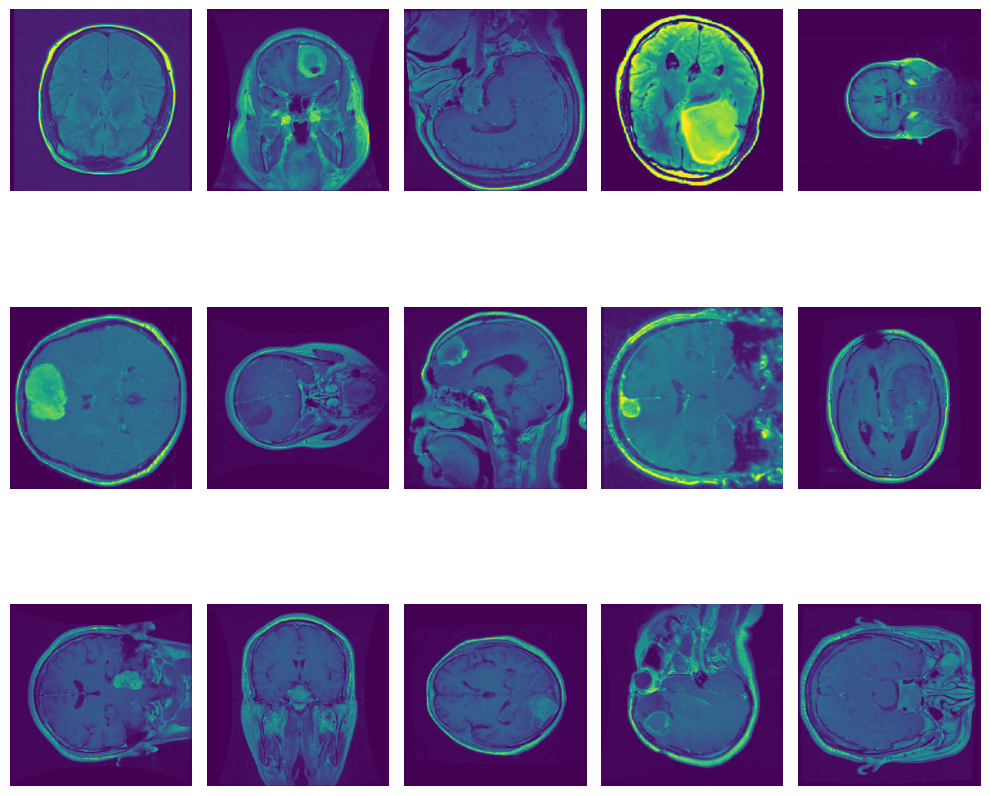

In [ ]:
images = [train_gen[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(image_size, image_size, 1))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
num_epochs = 1

patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [56, 28]  # Size of the dense layers of the final classifier

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = L.Dense(units, activation = tf.nn.gelu)(x)
        x = L.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(L.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates = [1, 1, 1, 1],
            padding = 'VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 7 X 7
Patches per image: 1024
Elements per patch: 49


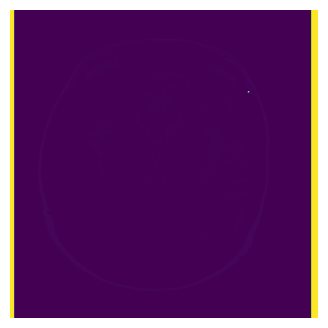

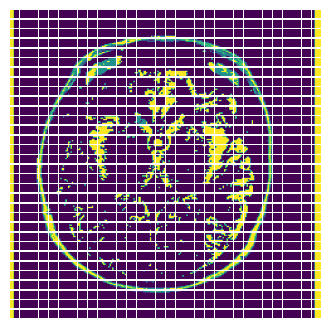

In [ ]:
plt.figure(figsize=(4, 4))

x = train_gen.next()
image = x[0][0]

plt.imshow(image.astype('uint8'))
plt.axis('off')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size = (image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f'Image size: {image_size} X {image_size}')
print(f'Patch size: {patch_size} X {patch_size}')
print(f'Patches per image: {patches.shape[1]}')
print(f'Elements per patch: {patches.shape[-1]}')

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 1))
    plt.imshow(patch_img.numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
class PatchEncoder(L.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = L.Dense(units = projection_dim)
        self.position_embedding = L.Embedding(
            input_dim = num_patches, output_dim = projection_dim
        )

    def call(self, patch):
        positions = tf.range(start = 0, limit = self.num_patches, delta = 1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def vision_transformer():
    inputs = L.Input(shape = (image_size, image_size, 1))

    # Create patches.
    patches = Patches(patch_size)(inputs)

    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):

        # Layer normalization 1.
        x1 = L.LayerNormalization(epsilon = 1e-6)(encoded_patches)

        # Create a multi-head attention layer.
        attention_output = L.MultiHeadAttention(
            num_heads = num_heads, key_dim = projection_dim, dropout = 0.1
        )(x1, x1)

        # Skip connection 1.
        x2 = L.Add()([attention_output, encoded_patches])

        # Layer normalization 2.
        x3 = L.LayerNormalization(epsilon = 1e-6)(x2)

        # MLP.
        x3 = mlp(x3, hidden_units = transformer_units, dropout_rate = 0.1)

        # Skip connection 2.
        encoded_patches = L.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = L.LayerNormalization(epsilon = 1e-6)(encoded_patches)
    representation = L.Flatten()(representation)
    representation = L.Dropout(0.5)(representation)

    # Add MLP.
    features = mlp(representation, hidden_units = mlp_head_units, dropout_rate = 0.5)

    # Classify outputs.
    logits = L.Dense(n_classes)(features)

    # Create the model.
    model = tf.keras.Model(inputs = inputs, outputs = logits)

    return model

In [ ]:
decay_steps = train_gen.n // train_gen.batch_size
initial_learning_rate = learning_rate

lr_decayed_fn = tf.keras.experimental.CosineDecay(initial_learning_rate, decay_steps)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_decayed_fn)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

model = vision_transformer()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.1),
              metrics = ['accuracy'])


STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n // valid_gen.batch_size

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'val_accuracy',
                                                  verbose = 1,
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, lr_scheduler, checkpointer]

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = num_epochs,
          callbacks = callbacks)

ValueError: ignored

# ViT model 2


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load labels and file paths into a pandas DataFrame
train_dir = '/content/drive/MyDrive/divided_datathon_dataset/train'
val_dir = '/content/drive/MyDrive/divided_datathon_dataset/val'
test_dir = '/content/drive/MyDrive/divided_datathon_dataset/test'

label_directories = ['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']
data = []

for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(train_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_path, image_file)
            data.append({'image_path': image_path, 'label': label_idx})

df_train = pd.DataFrame(data)
df_train['label'] = df_train['label'].astype(str)

print(df_train.head())
for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(val_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_path, image_file)
            data.append({'image_path': image_path, 'label': label_idx})

df_val = pd.DataFrame(data)
df_val['label'] = df_val['label'].astype(str)

for label_idx, label_dir in enumerate(label_directories):
    label_path = os.path.join(test_dir, label_dir)
    for image_file in os.listdir(label_path):
        if image_file.endswith('.jpg'):
            image_path = os.path.join(label_path, image_file)
            data.append({'image_path': image_path, 'label': label_idx})

df_test = pd.DataFrame(data)
df_test['label'] = df_test['label'].astype(str)

# Convert labels to TensorFlow one-hot encoding
# one_hot_labels = tf.keras.utils.to_categorical(df['label'], num_classes=len(label_directories))

# Define an ImageDataGenerator for data augmentation (optional)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          validation_split = 0.2,
                                                          preprocessing_function = data_augment)

                                          image_path label
0  /content/drive/MyDrive/divided_datathon_datase...     0
1  /content/drive/MyDrive/divided_datathon_datase...     0
2  /content/drive/MyDrive/divided_datathon_datase...     0
3  /content/drive/MyDrive/divided_datathon_datase...     0
4  /content/drive/MyDrive/divided_datathon_datase...     0


In [ ]:
import tensorflow as tf
y_train = df_train["label"]
x_train = df_train.drop(columns=["label"])
y_test = df_test["label"]
x_test = df_test.drop(columns=["label"])
y_val = df_val["label"]
x_val = df_val.drop(columns=["label"])
train_lab_categorical = tf.keras.utils.to_categorical(y_train, num_classes=4, dtype='uint8')
test_lab_categorical = tf.keras.utils.to_categorical(y_test, num_classes=4, dtype='uint8')
val_lab_categorical = tf.keras.utils.to_categorical(y_val, num_classes=4, dtype='uint8')

# from sklearn.model_selection import train_test_split
# train_im, valid_im, train_lab, valid_lab = train_test_split(x_train, train_lab_categorical, test_size=0.20, stratify=train_lab_categorical, random_state=40, shuffle = True)
training_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_data = tf.data.Dataset.from_tensor_slices((x_test,
test_lab_categorical))
autotune = tf.data.AUTOTUNE
train_data_batches = training_data.shuffle(buffer_size=40000).batch(128).prefetch(buffer_size=autotune)
valid_data_batches = validation_data.shuffle(buffer_size=10000).batch(32).prefetch(buffer_size=autotune)
test_data_batches = test_data.shuffle(buffer_size=10000).batch(32).prefetch(buffer_size=autotune)

In [ ]:
from tensorflow.keras import layers

##### generate patches
class generate_patch(layers.Layer):
  def __init__(self, patch_size):
    super(generate_patch, self).__init__()
    self.patch_size = patch_size

  def call(self, images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(images=images,
                                       sizes=[1, self.patch_size, self.patch_size, 1],
                                       strides=[1, self.patch_size, self.patch_size, 1], rates=[1, 1, 1, 1], padding="VALID")
    patch_dims = patches.shape[-1]
    patches = tf.reshape(patches, [batch_size, -1, patch_dims]) #here shape is (batch_size, num_patches, patch_h*patch_w*c)
    return patches

#############
# visualize
#############
from itertools import islice, count

train_iter_7im, train_iter_7label = next(islice(training_data, 7, None)) # access the 7th element from the iterator



train_iter_7im = tf.expand_dims(train_iter_7im, 0)
train_iter_7label = train_iter_7label.numpy()
patch_size=4


generate_patch_layer = generate_patch(patch_size=patch_size)
patches = generate_patch_layer(train_iter_7im)

print ('patch per image and patches shape: ', patches.shape[1], '\n', patches.shape)



InvalidArgumentError: ignored

In [ ]:
def render_image_and_patches(image, patches):
    plt.figure(figsize=(6, 6))
    plt.imshow(tf.cast(image[0], tf.uint8))
    plt.xlabel(class_types [np.argmax(train_iter_7label)], fontsize=13)
    n = int(np.sqrt(patches.shape[1]))
    plt.figure(figsize=(6, 6))
    #plt.suptitle(f"Image Patches", size=13)
    for i, patch in enumerate(patches[0]):
        ax = plt.subplot(n, n, i+1)
        patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
        ax.imshow(patch_img.numpy().astype("uint8"))
        ax.axis('off')




render_image_and_patches(train_iter_7im, patches)

In [ ]:
### Positonal Encoding Layer
class PatchEncode_Embed(layers.Layer):
  ‘’’
  2 steps happen here
  1. flatten the patches
  2. Map to dim D; patch embeddings
  ‘’’
  def __init__(self, num_patches, projection_dim):
    super(PatchEncode_Embed, self).__init__()
    self.num_patches = num_patches
    self.projection = layers.Dense(units=projection_dim)
    self.position_embedding = layers.Embedding(
    input_dim=num_patches, output_dim=projection_dim)
  def call(self, patch):
    positions = tf.range(start=0, limit=self.num_patches, delta=1)
    encoded = self.projection(patch) +               self.position_embedding(positions)
    return encoded

In [ ]:

'''
This part takes images as inputs,
Conv layer filter matches query dim of multi-head attention layer
Add embeddings by randomly initializing the weights
'''

def generate_patch_conv_orgPaper_f(patch_size, hidden_size, inputs):
  patches = layers.Conv2D(filters=hidden_size, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
  row_axis, col_axis = (1, 2) # channels last images
  seq_len = (inputs.shape[row_axis] // patch_size) * (inputs.shape[col_axis] // patch_size)
  x = tf.reshape(patches, [-1, seq_len, hidden_size])
  return x

### Positonal Encoding Layer

class AddPositionEmbs(layers.Layer):
  """inputs are image patches
  Custom layer to add positional embeddings to the inputs."""

  def __init__(self, posemb_init=None, **kwargs):
    super().__init__(**kwargs)
    self.posemb_init = posemb_init
    #posemb_init=tf.keras.initializers.RandomNormal(stddev=0.02), name='posembed_input') # used in original code

  def build(self, inputs_shape):
    pos_emb_shape = (1, inputs_shape[1], inputs_shape[2])
    self.pos_embedding = self.add_weight('pos_embedding', pos_emb_shape, initializer=self.posemb_init)

  def call(self, inputs, inputs_positions=None):
    # inputs.shape is (batch_size, seq_len, emb_dim).
    pos_embedding = tf.cast(self.pos_embedding, inputs.dtype)

    return inputs + pos_embedding

pos_embed_layer = AddPositionEmbs(posemb_init=tf.keras.initializers.RandomNormal(stddev=0.02))

# ViT model 3

In [ ]:
%pip install einops
import tensorflow as tf
from tensorflow.keras import layers, initializers, Sequential
from einops import *
from einops.layers.tensorflow import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.0 MB/s eta 0:00:00


In [ ]:
class PosEmbedding(layers.Layer):
  def __init__(self, patch_size, emb_dim):
    super().__init__()
    self.patcher = Rearrange('b (h p1) (w p2) c -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size)
    self.emb_dim = emb_dim
    self.patch_size = patch_size
    self.init = initializers.RandomNormal()

  def build(self, inp_dim):
    num_patches = (inp_dim[1]//self.patch_size) * (inp_dim[2]//self.patch_size)
    dim = self.patch_size * self.patch_size * inp_dim[-1] # p1 * p2 * c
    self.dense = EinMix('b np d -> b np e', weight_shape='d e', d=dim, e=self.emb_dim)
    self.pos_embedding = tf.Variable(self.init((1, num_patches+1, self.emb_dim)), trainable=True)
    self.cls_token = tf.Variable(self.init((1, 1, self.emb_dim)), trainable=True)

  def call(self, x, training=False):
    cls_token = tf.repeat(self.cls_token, tf.shape(x)[0], 0)
    x = self.dense(self.patcher(x), training=training)
    x = tf.concat([cls_token, x], axis=1)
    return x + self.pos_embedding

In [ ]:
class MHA(Layer):
  def __init__(self, heads=8, dim_head=64):
    super().__init__()
    inner_dim = dim_head * heads
    self.heads = heads
    self.scale = dim_head ** -0.5
    self.to_qkv = layers.Dense(units=inner_dim * 3, use_bias=False)

  def call(self, x, training=False):
    x = self.to_qkv(x, training=training)
    qkv = tf.split(x, num_or_size_splits=3, axis=-1)
    q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=self.heads), qkv)
    qk = tf.nn.softmax(einsum(q, k, 'b h i d, b h j d -> b h i j') * self.scale)
    attn = einsum(qk, v, 'b h i j, b h j d -> b h i d')
    return rearrange(attn, 'b h i d -> b i (h d)')

In [ ]:
class TransformerBlock(layers.Layer):
  def __init__(self, heads, dim_heads):
    super().__init__()
    self.mha = MHA(heads, dim_heads)
    self.fc = Sequential([layers.Dense(dim_heads*heads, activation=tf.keras.activations.gelu),
                           layers.Dense(dim_heads*heads)])
    self.ln1 = layers.LayerNormalization()
    self.ln2 = layers.LayerNormalization()

  def call(self, x, training=False):
    x = self.mha(self.ln1(x, training=training))
    h = self.ln2(x, training=training)
    return self.fc(h) + x

In [ ]:
class TransformerEncoder(tf.keras.Model):
  def __init__(self, heads, dim_heads, n):
    super().__init__()
    self.module = [TransformerBlock(heads, dim_heads) for _ in range(n)]

  def call(self, x, training=False):
    for layer in self.module:
      x = layer(x, training=training)
    return x

In [ ]:
class ViT(tf.keras.Model):
  def __init__(self, classes, patch, dim, heads, dim_heads, n):
    super().__init__()
    self.embedding = PosEmbedding(patch, dim)
    self.transformer = TransformerEncoder(heads, dim_heads, n)
    self.fc = layers.Dense(classes)

  def call(self, x, training=False):
    x = self.embedding(x, training=training)
    x = self.transformer(x, training=training)
    x = self.fc(x, training=training)
    return tf.nn.softmax(x[:, 0, :])

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/divided_datathon_dataset/train", label_mode="int", image_size=(224, 224), batch_size=8)
val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/divided_datathon_dataset/val", label_mode="int", image_size=(224, 224), batch_size=8)

# rescale images in [0, 1]
train_ds = train_ds.map(lambda x, y: (x/255.0, y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))

# shuffle and prefetch to gain in efficiency at train and val time
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 1938 files belonging to 4 classes.
Found 647 files belonging to 4 classes.


In [ ]:
epochs = 25
model = ViT(6, 4, 64, 4, 32, 3) # classes

#@title Compiling
model.compile(
    optimizer=tf.keras.optimizers.Adam(), # AdamW has been proven better than Adam + L2 for fast convergence
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sparse CE Loss
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.SparseCategoricalAccuracy()],) # Sparse Accuracy

#@title callbacks
early_stop = tf.keras.callbacks.EarlyStopping(patience=15)

#@title Training
model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stop])

Epoch 1/25
243/243 [==============================] - 147s 558ms/step - loss: 1.3696 - categorical_accuracy: 0.3132 - sparse_categorical_accuracy: 0.3829 - val_loss: 1.7727 - val_categorical_accuracy: 0.0000e+00 - val_sparse_categorical_accuracy: 0.3632
Epoch 2/25
243/243 [==============================] - 135s 554ms/step - loss: 1.0111 - categorical_accuracy: 0.2595 - sparse_categorical_accuracy: 0.5645 - val_loss: 0.8445 - val_categorical_accuracy: 0.2581 - val_sparse_categorical_accuracy: 0.6739
Epoch 3/25
243/243 [==============================] - 135s 554ms/step - loss: 0.8297 - categorical_accuracy: 0.2477 - sparse_categorical_accuracy: 0.6852 - val_loss: 0.9383 - val_categorical_accuracy: 0.3787 - val_sparse_categorical_accuracy: 0.6198
Epoch 4/25
243/243 [==============================] - 135s 555ms/step - loss: 0.7508 - categorical_accuracy: 0.2425 - sparse_categorical_accuracy: 0.6987 - val_loss: 0.7813 - val_categorical_accuracy: 0.1963 - val_sparse_categorical_accuracy: 0.7

In [ ]:
model.save('model_vit.h5')

NotImplementedError: ignored

# Testing

In [ ]:
from tensorflow.keras.models import Model,load_model
model = load_model('model2_1.h5')

In [ ]:
test_data_gen = ImageDataGenerator()  # You can customize this if needed
batch_size = 32

test_set = test_data_gen.flow_from_directory(
    directory="/content/drive/MyDrive/divided_datathon_dataset/test",
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

predictions = model.predict(test_set)
predicted_classes = predictions.argmax(axis=1)

Found 649 images belonging to 4 classes.


InvalidArgumentError: ignored

In [ ]:
ground_truth_labels = test_set.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, predicted_classes)

class_names = ['tumor_1', 'tumor_2','tumor_3','no']  # Replace with your class names
classification_rep = classification_report(
    ground_truth_labels, predicted_classes,
    target_names=class_names, output_dict=True
)

precision = classification_rep['weighted avg']['precision']
recall = classification_rep['weighted avg']['recall']
f1_score = classification_rep['weighted avg']['f1-score']

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[ 73  78  11  22]
 [ 19 146   6  17]
 [  0   8 162   9]
 [  3  11   7  77]]

Precision: 0.725139340525347
Recall: 0.7057010785824345
F1 Score: 0.6937225402061481


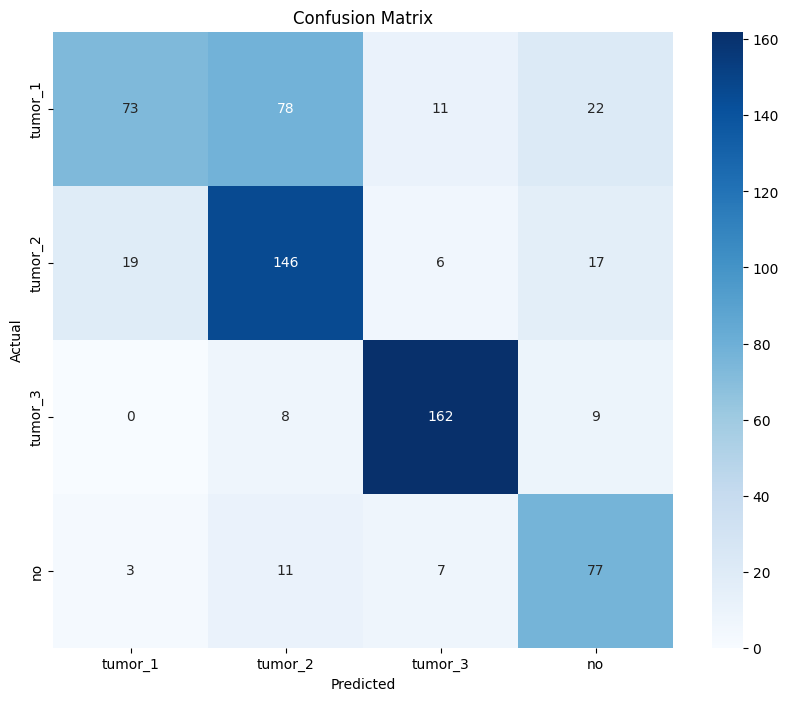

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
